# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Drought_clean.csv", encoding="latin1")

In [3]:
df.head()

,Description,Alertlevel,Alertscore,Episodealertscore,Country,Fromdate,Todate,Severity (km2),Iso3,Gdacs id,Duration (days),Impact,Longitude,Latitude
0,"Green Drought in Germany, Denmark, France, Lat...",Green,1.0,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21,2019-02-09 15:07:00,80936.0,DEU,DR 1012168,569.0,Minor impact for agricultural drought in 80936...,11.087,53.882
1,Green Drought in Uzbekistan from: 21 Nov 2017 ...,Green,1.0,0.75,Uzbekistan,2017-11-21,2018-09-06 09:57:00,18686.0,UZB,DR 1012172,289.0,Minor impact for agricultural drought in 18686...,65.500,40.996
2,Green Drought in Brazil from: 21 Dec 2017 to:...,Green,1.0,0.50,Brazil,2017-12-21,2018-09-06 09:57:00,87604.0,BRA,DR 1012174,259.0,Minor impact for agricultural drought in 87604...,-50.105,-21.917
3,Orange Drought in Australia from: 21 Feb 2018 ...,Orange,2.0,1.00,Australia,2018-02-21,2018-11-24 16:27:00,142608.0,AUS,DR 1012191,277.0,Medium impact for agricultural drought in 1426...,144.500,-33.500
4,Orange Drought in Madagascar from: 21 Mar 2018...,Orange,2.0,1.50,Madagascar,2018-03-21,2018-09-13 13:57:00,68692.0,MDG,DR 1012304,177.0,Medium impact for agricultural drought in 6869...,46.464,-19.498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        240 non-null    object 
 1   Alertlevel         240 non-null    object 
 2   Alertscore         240 non-null    float64
 3   Episodealertscore  240 non-null    float64
 4   Country            240 non-null    object 
 5   Fromdate           240 non-null    object 
 6   Todate             240 non-null    object 
 7   Severity (km2)     240 non-null    float64
 8   Iso3               240 non-null    object 
 9   Gdacs id           240 non-null    object 
 10  Duration (days)    240 non-null    float64
 11  Impact             240 non-null    object 
 12  Longitude          240 non-null    float64
 13  Latitude           240 non-null    float64
dtypes: float64(6), object(8)
memory usage: 26.4+ KB


In [16]:
df.describe()


,Alertscore,Episodealertscore,Severity (km2),Duration (days),Longitude,Latitude
count,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,1.200000,0.618750,1.337732e+05,199.508333,10.660996,14.494423
std,0.459215,0.448688,2.054140e+05,167.445413,75.454871,28.851376
min,1.000000,0.000000,1.457000e+03,20.000000,-122.500000,-51.463000
25%,1.000000,0.250000,3.451750e+04,90.000000,-67.750000,-9.381250
50%,1.000000,0.500000,6.896400e+04,143.000000,18.552000,18.414500
75%,1.000000,0.750000,1.420755e+05,243.000000,67.525250,39.118250
max,3.000000,2.250000,1.677855e+06,1024.000000,175.629000,68.007000


In [5]:
df.shape

(240, 14)

In [6]:
print(df.columns.tolist())


['Description', 'Alertlevel', 'Alertscore', 'Episodealertscore', 'Country', 'Fromdate', 'Todate', 'Severity (km2)', 'Iso3', 'Gdacs id', 'Duration (days)', 'Impact', 'Longitude', 'Latitude']


In [7]:
df["Alertscore"].value_counts()


Alertscore
1.0    198
2.0     36
3.0      6
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Description          0
Alertlevel           0
Alertscore           0
Episodealertscore    0
Country              0
Fromdate             0
Todate               0
Severity (km2)       0
Iso3                 0
Gdacs id             0
Duration (days)      0
Impact               0
Longitude            0
Latitude             0
dtype: int64

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])



## Correlation Heatmap

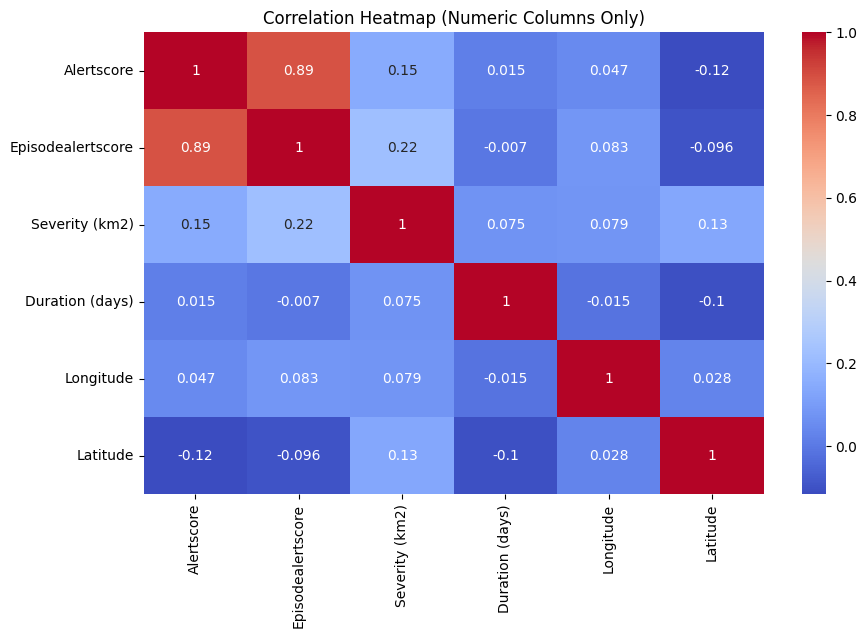

In [21]:
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.savefig("task5charts/Correlation_Heatmap .png")
plt.show()


## Histograms 

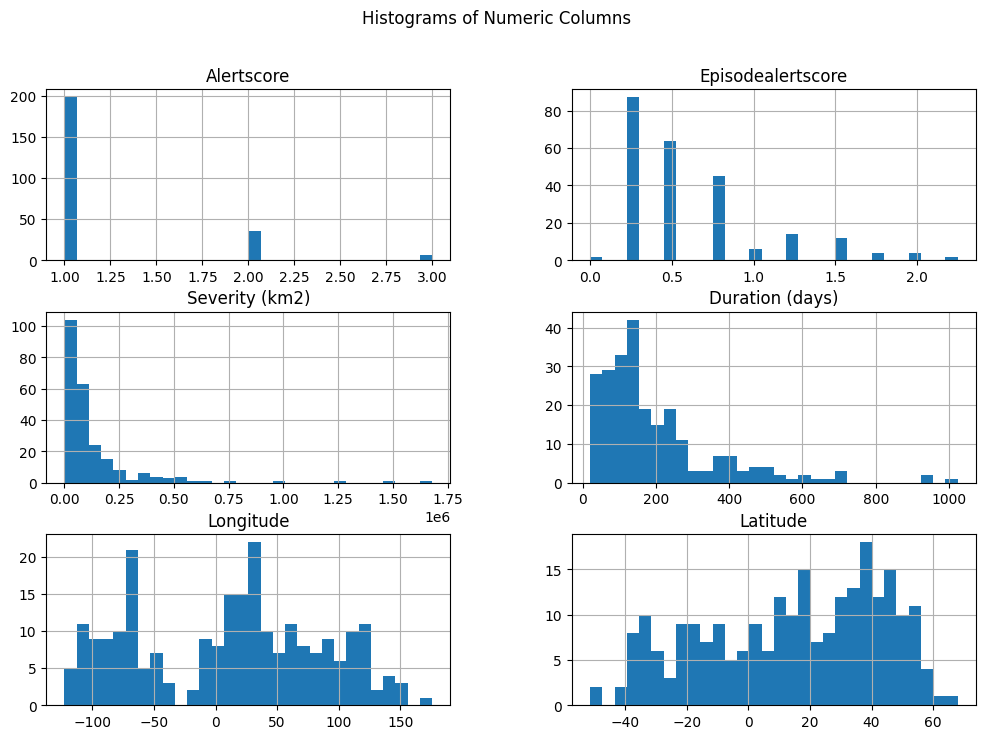

In [22]:
numeric_df.hist(figsize=(12,8), bins=30)
plt.suptitle("Histograms of Numeric Columns")
plt.savefig("task5charts/ Histograms.png")
plt.show()


## Boxplot

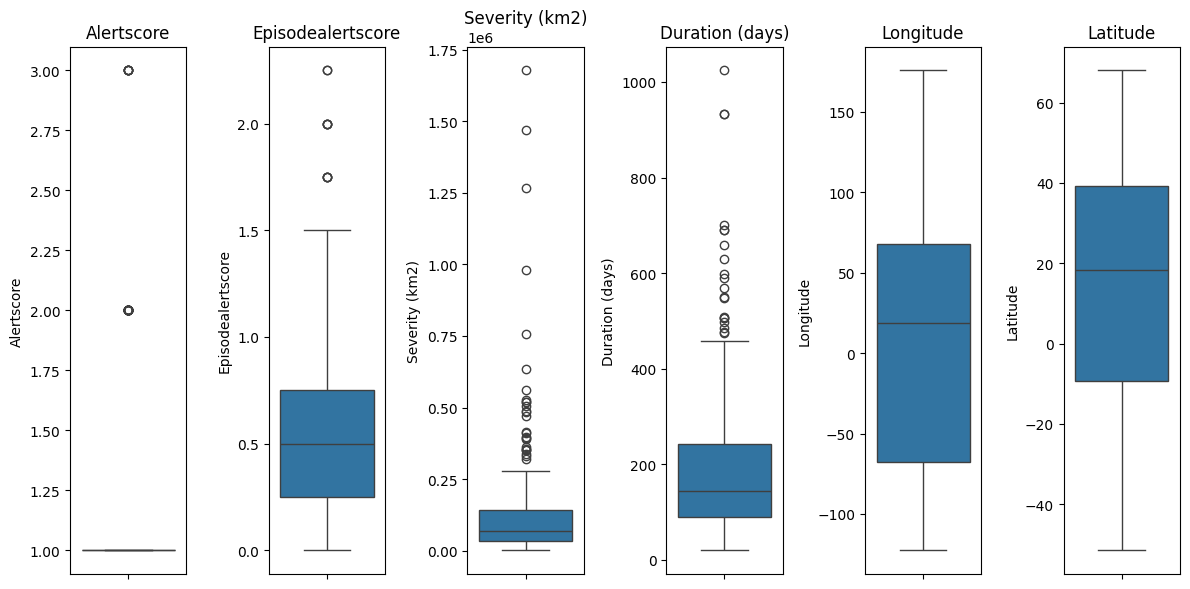

In [23]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(1, len(numeric_df.columns), i+1)
    sns.boxplot(y=numeric_df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig("task5charts/ Boxplot.png")
plt.show()


## Pairplot

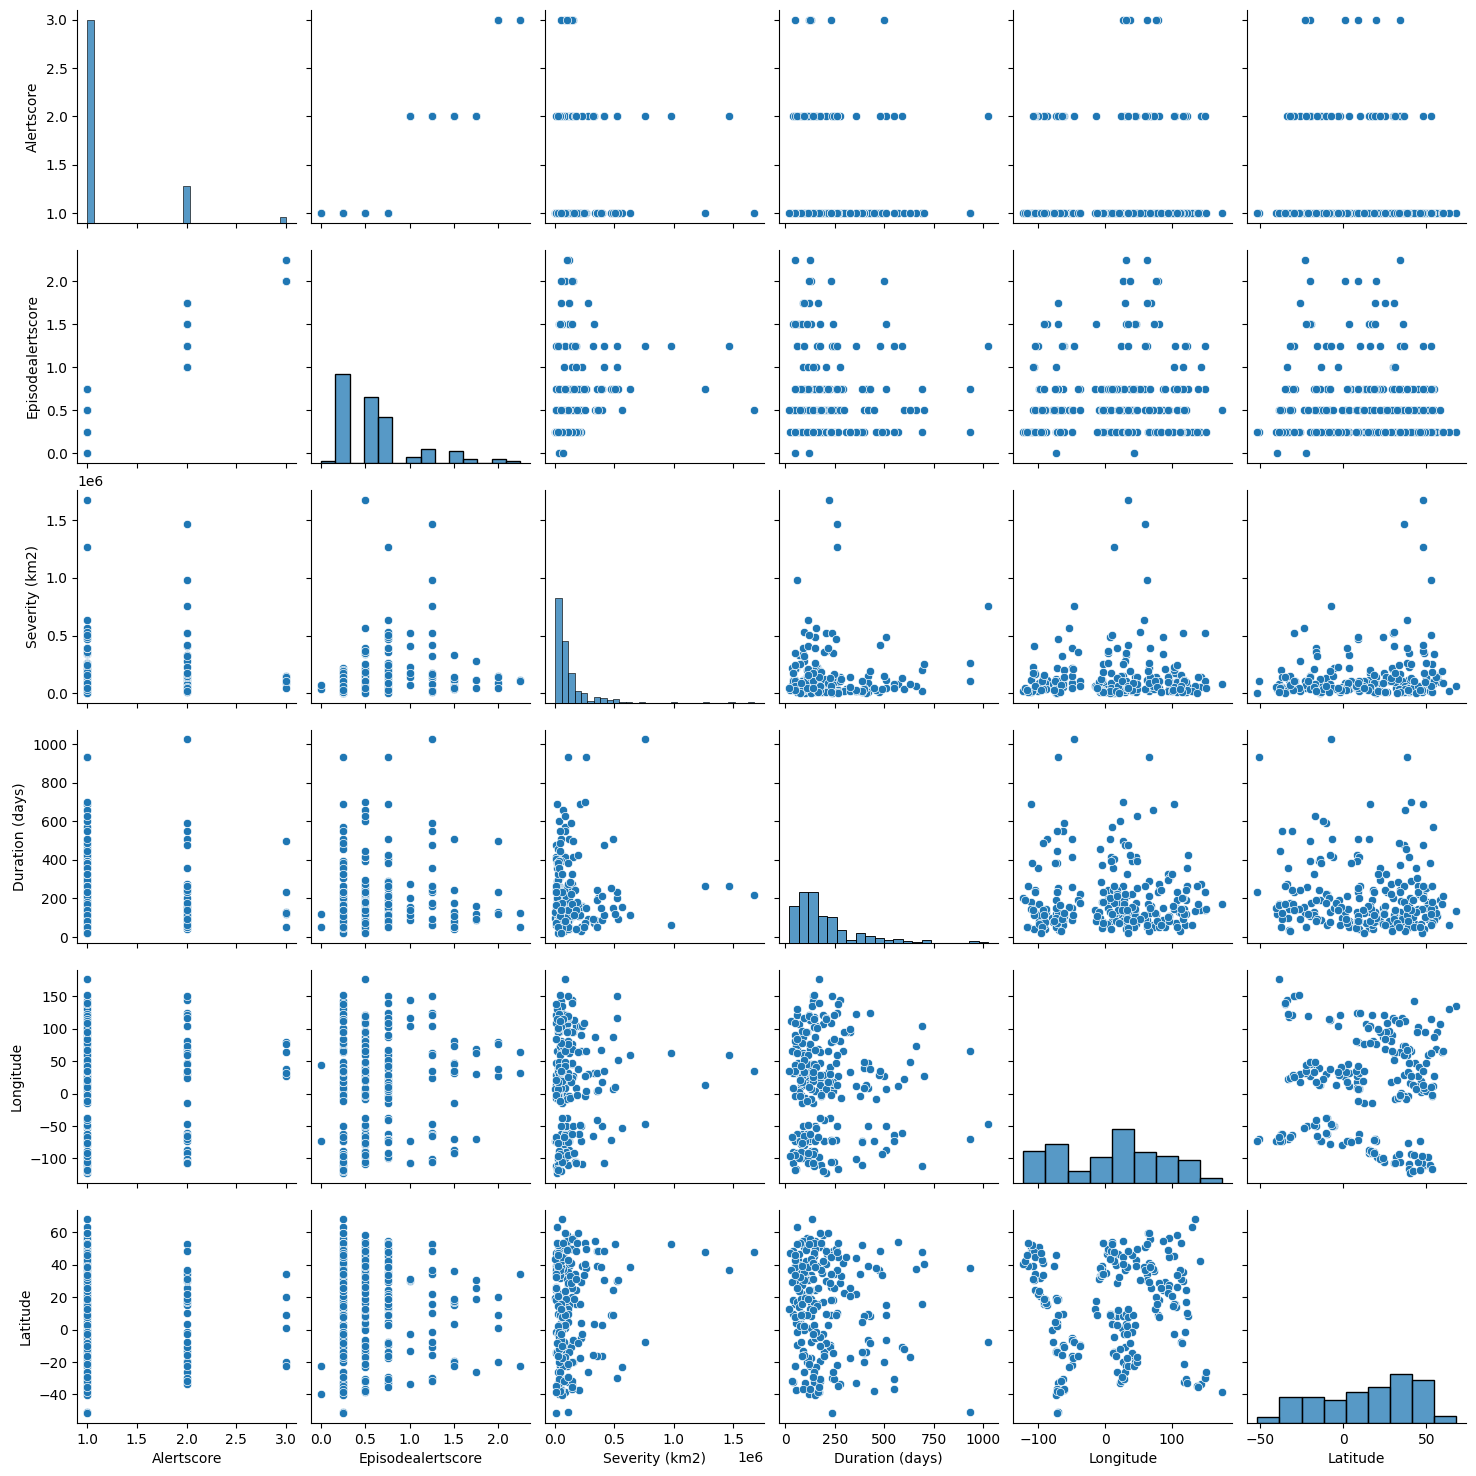

In [24]:
sns.pairplot(numeric_df)
plt.savefig("task5charts/ pairplot.png")
plt.show()


## Scatterplot

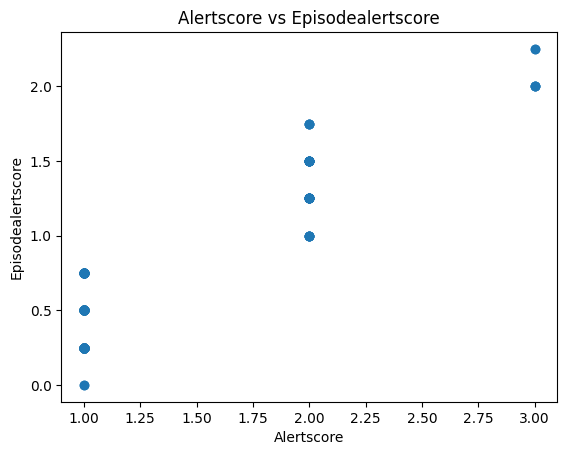

In [28]:
plt.scatter(df["Alertscore"], df["Episodealertscore"])
plt.xlabel("Alertscore")
plt.ylabel("Episodealertscore")
plt.title("Alertscore vs Episodealertscore")
plt.savefig("task5charts/ Scatterplot.png")
plt.show()


## Severitytrend and Relationship

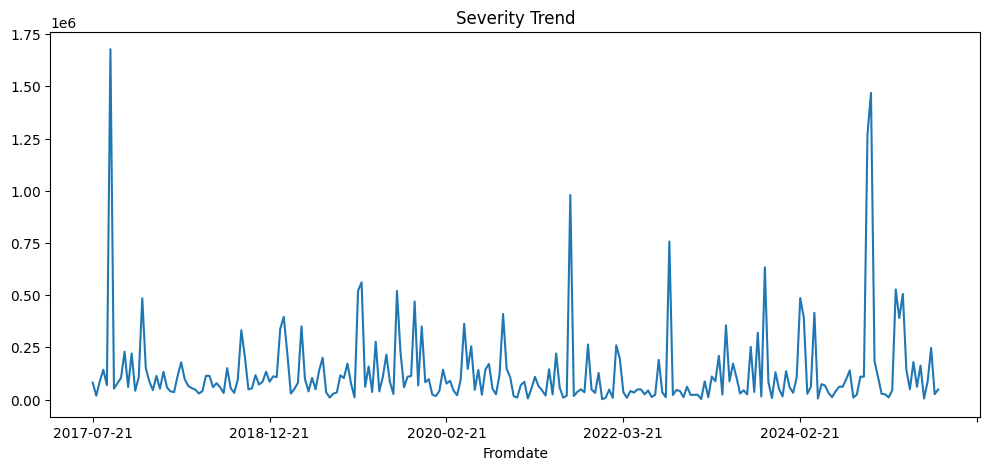

In [26]:
df.set_index('Fromdate')['Severity (km2)'].plot(figsize=(12,5), title='Severity Trend')
plt.savefig("task5charts/ severitytrend.png")


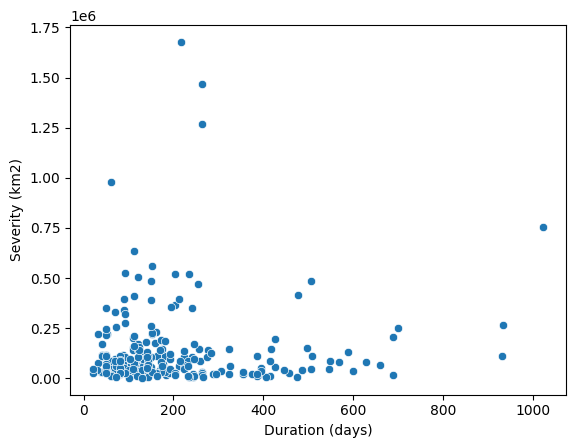

In [29]:
sns.scatterplot(data=df, x='Duration (days)', y='Severity (km2)')
plt.savefig("task5charts/ scatter_relationship.png")


In [ ]:
df.t